In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

In [4]:
# Input your vacation start and end dates
startdate = input('Enter vacation start date (yyyy-mm-dd): ')
enddate = input('Enter vacation end date (yyyy-mm-dd): ')

Enter vacation start date (yyyy-mm-dd): 2017-01-28
Enter vacation end date (yyyy-mm-dd): 2017-02-15


# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Print fields in the measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(f'{c["name"]}      \t{c["type"]}')

id      	INTEGER
station      	TEXT
date      	TEXT
prcp      	FLOAT
tobs      	FLOAT


In [12]:
# Preview the measurement table
engine.execute('SELECT * FROM  Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [13]:
# Print Fields in the station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(f'{c["name"]}      \t{c["type"]}')

id      	INTEGER
station      	TEXT
name      	TEXT
latitude      	FLOAT
longitude      	FLOAT
elevation      	FLOAT


In [14]:
# Preview the station table
engine.execute('SELECT * FROM  Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Find last date in database from Measurements 
last_date = last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date

# Convert last date string to date
last_date=dt.datetime.strptime(last_date, "%Y-%m-%d")

# Calculate date one year after last date using timedelta datetime function
first_date = last_date - timedelta(days=365)

lastdate=pd.to_datetime(last_date).date()
firstdate=pd.to_datetime(first_date).date()
print(lastdate)
print(firstdate)

2017-08-23
2016-08-23


In [16]:
# Perform a query to retrieve the precipitation data
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= first_date).all()

In [17]:
# Load data to a dataframe
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation'])
precipitation_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [18]:
# Clean up non value entries
precipitation_df = precipitation_df.dropna()
precipitation_df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2216,2017-08-17,0.13
2218,2017-08-19,0.09
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [19]:
# Sort dataframe by date
precipitation_df = precipitation_df.sort_values(by='Date', ascending=True)
precipitation_df

,Date,Precipitation
0,2016-08-24,0.08
1188,2016-08-24,1.22
702,2016-08-24,2.28
1875,2016-08-24,1.45
360,2016-08-24,2.15
...,...,...
2221,2017-08-22,0.50
359,2017-08-23,0.00
1523,2017-08-23,0.08
1005,2017-08-23,0.00


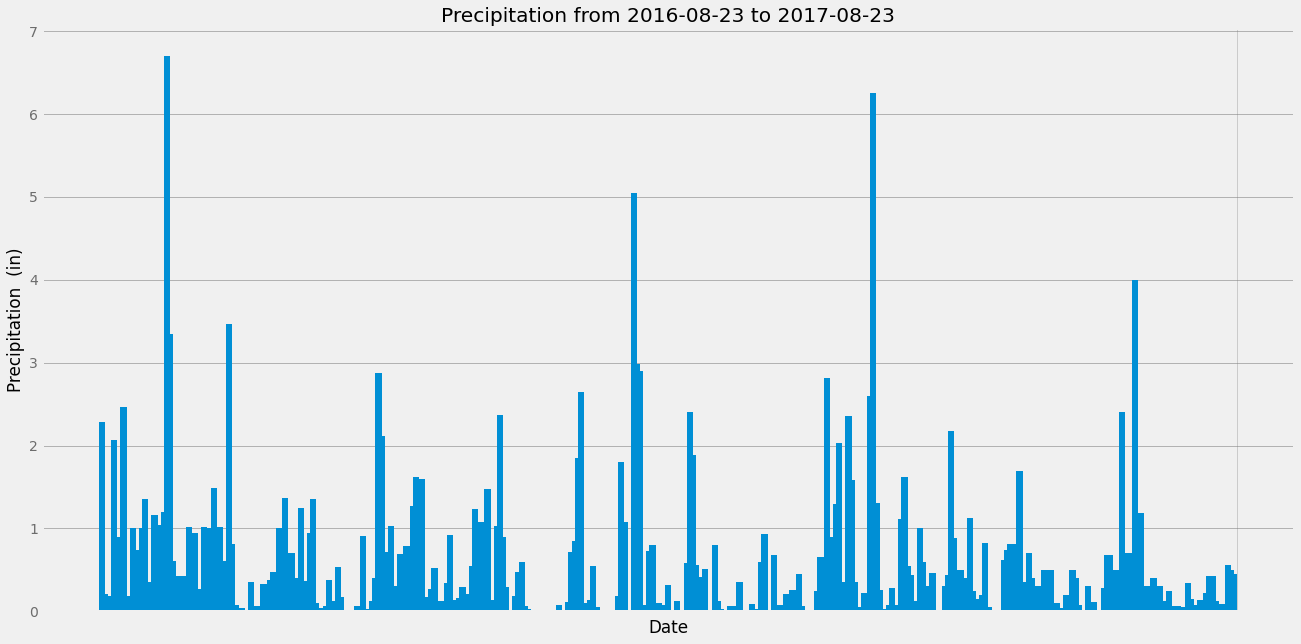

In [20]:
# Resize the plot
plt.figure(figsize=(20,10))

# Plot the precipitation
plt.bar(precipitation_df["Date"], precipitation_df["Precipitation"], 
        align='center', width=2);

# Add labels and Title
plt.xlabel('Date')
plt.ylabel('Precipitation  (in)')
plt.title(f"Precipitation from {firstdate} to {lastdate}")

# Add Grids
plt.grid(b=bool, which='major', axis='y', color='grey',  alpha=0.55)

# Add ticks
plt.xticks("", rotation=90, alpha=0.55)
plt.yticks(rotation=0, alpha=0.55)

# Save Plot
plt.savefig("Output/Fig 1. Barchart - Precipitation by Date" +'.png',bbox_inches='tight')

#Show the Plot
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_counts = session.query(Station.station, func.count(Station.id)).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Station.station).desc()).all()

station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Choose the station with the highest number of temperature observations.
# Create top station variable from tuple
top_station = (station_counts[0])
top_station = (top_station[0])

top_station

'USC00519281'

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(Measurement.station,  func.min(Measurement.tobs), 
              func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == top_station).\
    group_by(Measurement.station).all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station = session.query(Measurement.date,  Measurement.tobs).\
                    filter(Measurement.station == top_station).\
                    filter(Measurement.date >= first_date).all()

In [27]:
# Top Station Temperature dataframe cleanning process
top_station_df = pd.DataFrame(top_station, columns=['Date', 'Temperature'])
top_station_df = top_station_df.sort_values(by='Date', ascending=True)
top_station_df.set_index('Date', inplace=True)

top_station_df

,Temperature
Date,
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
2016-08-28,73.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


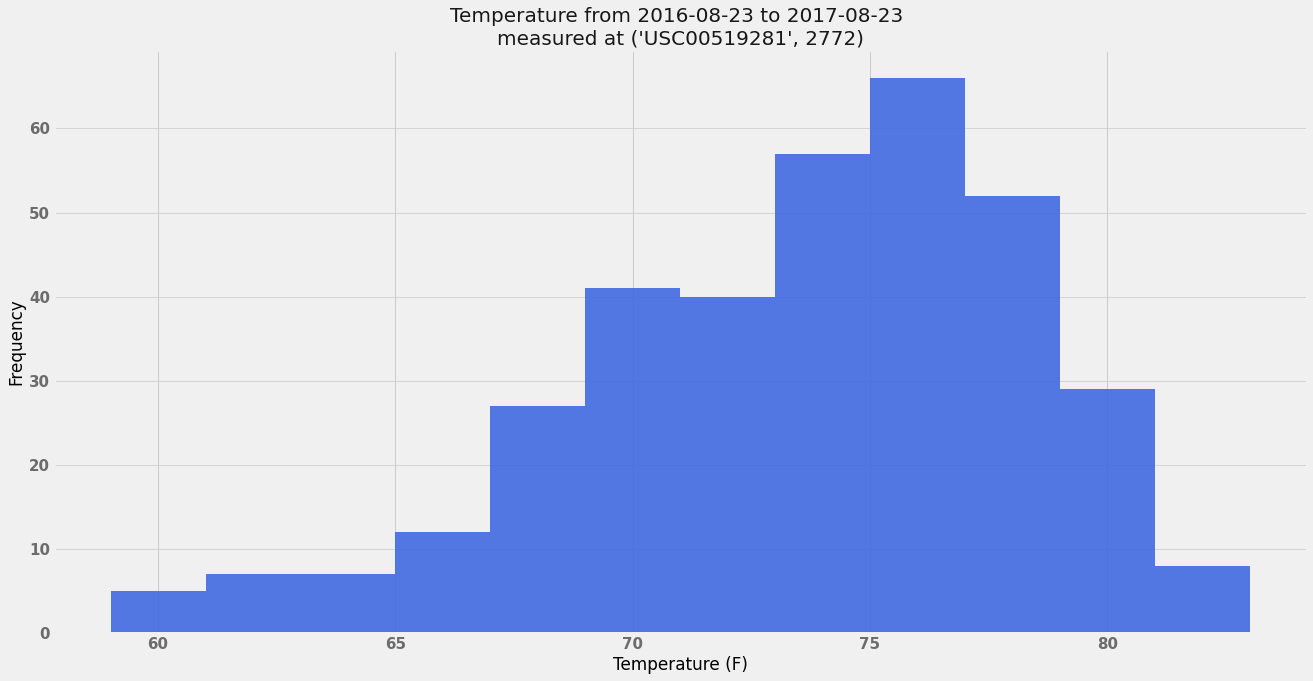

In [28]:
# Resize Plot
plt.figure(figsize=[20,10])

# Define Histogram paramaters
n, bins, patches = plt.hist(x=top_station_df["Temperature"], bins=12, 
                           color='royalblue',alpha=0.9)
# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=15, fontweight="bold", alpha=0.55)
plt.yticks(fontsize=15, fontweight="bold", alpha=0.55)
plt.title(f"Temperature from {firstdate} to {lastdate} \nmeasured at {station_counts[0]}",
          alpha=0.9, fontsize=20)

# Save Plot
plt.savefig("Output/Fig 2. Histogram - Temperature Frequency for the Top Station" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp_results = calc_temps(startdate, enddate)
print(temp_results)

[(59.0, 69.48360655737704, 80.0)]


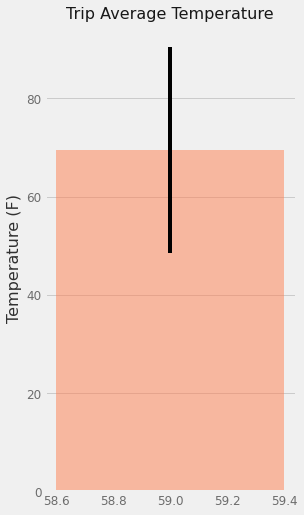

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
xpos = 1
avg_temp = plt.bar(((temp_results[0])[0]), ((temp_results[0])[1]),  yerr=(((temp_results[0])[2])-((temp_results[0])[0])),alpha=0.5, color='coral', align="center")
plt.ylabel('Temperature (F)',alpha=0.8, fontsize=16);
plt.xticks(fontsize=12, alpha=0.55);
plt.yticks(fontsize=12, alpha=0.55);
plt.title('Trip Average Temperature',alpha=0.9, fontsize=16);
plt.grid(b=None, which='major', axis='x')


# Save Plot
plt.savefig("Output/Fig 3. Barchart - Trip Average Temperature" +'.png',bbox_inches='tight');

#Show the Plot
plt.show();

In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

query_columns = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

session.query(*query_columns).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= startdate).\
    filter(Measurement.date <= enddate).\
    group_by(Station.name).order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  7.449999999999999),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  6.91),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  6.49),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  5.24),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  4.98),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 3.63),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.05)]

In [33]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

dtobj = dt.datetime.strptime(startdate, '%Y-%m-%d')
enddtobj = dt.datetime.strptime(enddate, '%Y-%m-%d')

tripdates = []
normals =[]
while (dtobj <= enddtobj):
    tripdates.append(dt.datetime.strftime(dtobj,'%Y-%m-%d'))
    datestr = dt.datetime.strftime(dtobj,'%m-%d')
    normals.append(list(np.ravel(daily_normals(datestr))))
    dtobj = dtobj + dt.timedelta(days = 1)

print(startdate)
print(enddate)

normals

2017-01-28
2017-02-15


[[62.0, 69.03703703703704, 77.0],
 [64.0, 69.14, 76.0],
 [60.0, 67.12962962962963, 77.0],
 [60.0, 68.47368421052632, 74.0],
 [56.0, 68.14035087719299, 78.0],
 [59.0, 68.85964912280701, 77.0],
 [58.0, 67.79661016949153, 77.0],
 [61.0, 68.14035087719299, 76.0],
 [59.0, 69.6842105263158, 80.0],
 [58.0, 70.38983050847457, 77.0],
 [60.0, 69.0, 77.0],
 [56.0, 66.75438596491227, 74.0],
 [57.0, 67.58928571428571, 75.0],
 [56.0, 68.41666666666667, 76.0],
 [61.0, 69.25, 79.0],
 [60.0, 69.15789473684211, 78.0],
 [58.0, 70.36206896551724, 80.0],
 [62.0, 70.89473684210526, 79.0],
 [56.0, 70.28813559322033, 79.0]]

In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
thisplan = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
thisplan['Date'] = tripdates
thisplan = thisplan.set_index("Date")
thisplan

,tmin,tavg,tmax
Date,,,
2017-01-28,62.0,69.037037,77.0
2017-01-29,64.0,69.140000,76.0
2017-01-30,60.0,67.129630,77.0
2017-01-31,60.0,68.473684,74.0
2017-02-01,56.0,68.140351,78.0
2017-02-02,59.0,68.859649,77.0
2017-02-03,58.0,67.796610,77.0
2017-02-04,61.0,68.140351,76.0
2017-02-05,59.0,69.684211,80.0


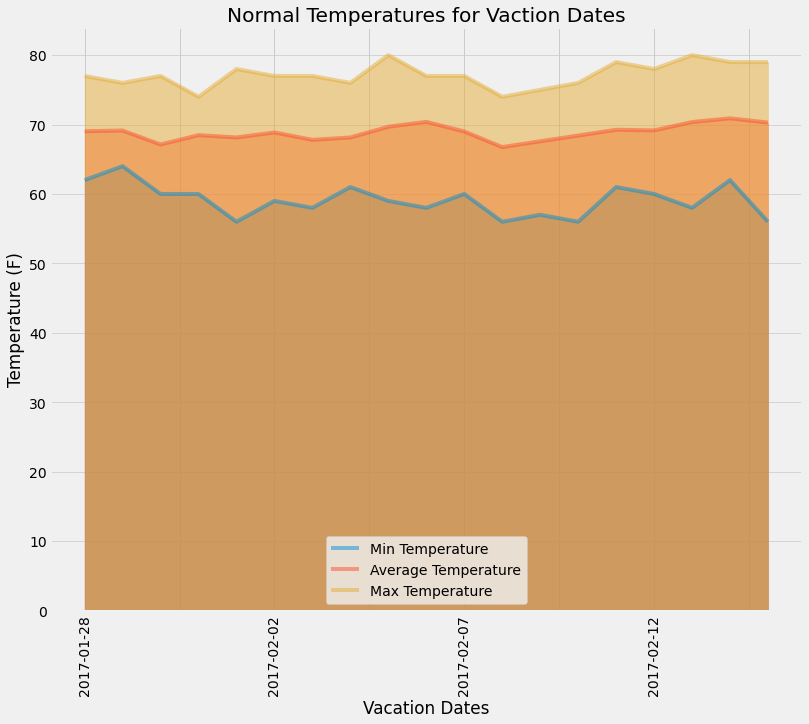

In [36]:
# Plot the daily normals as an area plot with `stacked=False`
thisplan.plot.area(stacked=False, figsize=(12, 10))

# Legend
plt.legend(('Min Temperature', 'Average Temperature', 'Max Temperature'),loc='lower center')

# Labeling, tickers and grids
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Vacation Dates')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=90)
plt.title('Normal Temperatures for Vaction Dates') 

# Save Plot
plt.savefig("Output/Fig 4. Area Plot - Normal Temperatures for Vacation Dates" +'.png',
            bbox_inches='tight')

#Show the Plot
plt.show();